In [1]:
# Data Augmentation To Address Overfitting In Flower Classification CNN

In [2]:
'''
In this notebook we will build a CNN to classify flower images. 
We will also see how our model overfits and how overfitting can be addressed using data augmentation. 
Data augmentation is a process of generating new training samples from current training 
dataset using transformations such as zoom, rotations, change in contrast etc
'''

'\nIn this notebook we will build a CNN to classify flower images. \nWe will also see how our model overfits and how overfitting can be addressed using data augmentation. \nData augmentation is a process of generating new training samples from current training \ndataset using transformations such as zoom, rotations, change in contrast etc\n'

In [3]:
# In below image, 4 new training samples are generated from original sample using different transformations

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# We will download flowers dataset from google website and store it locally. 
# In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [6]:
# Load flowers dataset

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir= r'P:\AI Engineer', untar=True)
# cache_dir indicates where to download data. I specified '.' which means current directory
# untar true will unzip it

In [8]:
data_dir

'P:\\AI Engineer\\datasets\\flower_photos'

In [9]:
# pathlib coverts out path to windows path object
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir = data_dir / 'flower_photos' #remove
data_dir

WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos')

In [10]:
# give me all images with extensions .jpg
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
#total number of images with .jpg

3670


In [12]:
# give me first 5 images inside roses directory
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
len(roses)

641

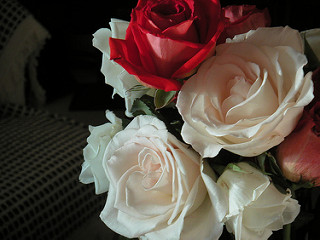

In [14]:
PIL.Image.open(str(roses[1]))

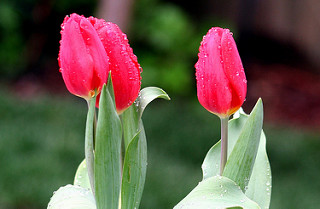

In [15]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [16]:
len(tulips)

799

In [17]:
# Read flowers images from disk into numpy array using opencv

In [18]:
# our directories are 'roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
# just gives somes numbers as values for keys
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('P:/AI Engineer/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [22]:
# coverting the paths to str, because cv2 will not accept windows path object
str(flowers_images_dict['roses'][0])

'P:\\AI Engineer\\datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [23]:
# open cv converts specific images related to path ['roses'][0] to numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], shape=(240, 179, 3), dtype=uint8)

In [24]:
img.shape # this is 3D

(240, 179, 3)

In [25]:
# making universal sixe fo all images.
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [26]:
X, y = [], []

#iterating through all the images in all directories in dict
# flower_name -> key , path -> value
for flower_name, path in flowers_images_dict.items():
    # im going through all the images
    for image in path:
        img = cv2.imread(str(image)) # open cv converts specific images related to path to numpy array
        resized_img = cv2.resize(img,(180,180)) #resize
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) # we are using labels_dict of flowers created earlier, so we get number values associated with it.

In [27]:
flowers_labels_dict['roses']

0

In [28]:
flowers_labels_dict['tulips']

4

In [29]:
X

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], shape=(180, 180, 3), dtype=uint8),
 array([[[13, 18, 17]

In [30]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
# converting X and y to numpy
X = np.array(X)
y = np.array(y)

In [32]:
# Train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [34]:
# Preprocessing: scale images

In [35]:
# normalizing and scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [36]:
# Build convolutional neural network and train it

In [37]:
num_classes = 5 # we have 5 clases 'roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), # we've 16 filters in first convolution layer and each filter id 3X3, padding is added
  layers.MaxPooling2D(), # max pooling layer to reduce dimension
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), # after flattening to 1D array
  layers.Dense(128, activation='relu'), # we add dense layers 128 hidden neurons for hidden layer
  layers.Dense(num_classes) # here output neuron = 5 and no activation is specified, so by default, it uses linear activation function
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.3721 - loss: 1.5418
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.5694 - loss: 1.0719
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.6581 - loss: 0.9017
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.7220 - loss: 0.7520
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7914 - loss: 0.5772
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.8586 - loss: 0.4028
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9128 - loss: 0.2535
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.9539 - loss: 0.1569
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9727 - loss: 0.0935
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9884 - loss: 0.0541
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9804 - loss: 0.0759
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14

In [38]:
# on training set we got very high accuracy 0.9924
# on testing set we got 0.607 accuracy
# so our modelis clearly overfitting
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6492 - loss: 2.6773


[2.677299737930298, 0.6492374539375305]

In [39]:
'''
Here we see that while train accuracy is very high (99%), the test accuracy is 
significantly low (60.7%) indicating overfitting. 
Let's make some predictions before we use data augmentation to address overfitting'''

"\nHere we see that while train accuracy is very high (99%), the test accuracy is \nsignificantly low (60.7%) indicating overfitting. \nLet's make some predictions before we use data augmentation to address overfitting"

In [40]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


array([[  5.585642  ,  15.594012  ,  -0.98689413, -25.967592  ,
         -5.770937  ],
       [ 14.204642  ,   5.3120074 ,  -5.678743  ,  -5.5453143 ,
          7.3383465 ],
       [ -7.4533057 ,   2.3108363 ,  15.804484  , -18.631447  ,
         -7.492976  ],
       ...,
       [  1.8254336 ,   2.571216  ,  -3.8754325 ,   8.547265  ,
          2.9007792 ],
       [  6.418719  ,   2.752041  ,  -3.4724226 ,  -2.3445077 ,
          5.651951  ],
       [  6.5179105 , -11.393352  ,   0.13353488,  12.62724   ,
          3.682553  ]], shape=(918, 5), dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[0])
score
# softmax coverts to range between 0 and 1

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.5019475e-05, 9.9995494e-01, 6.2948374e-08, 8.9126209e-19,
       5.2638233e-10], dtype=float32)>

In [42]:
np.argmax(score)

np.int64(1)

In [43]:
y_test[0]

np.int64(1)

In [44]:
# Improve Test Accuracy Using Data Augmentation

In [45]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Original Image

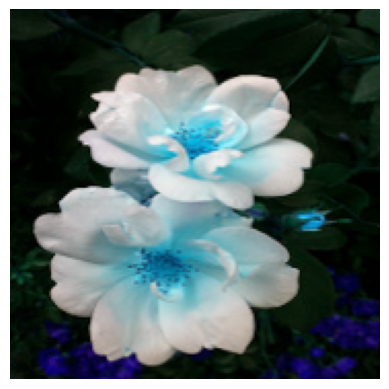

In [47]:
plt.axis('off')
plt.imshow(X[0])

In [48]:
# Newly generated training sample using data augmentation

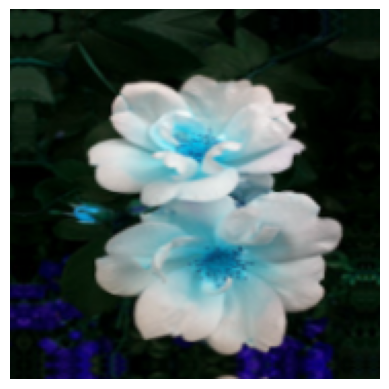

In [49]:
# applied all modifications specified in data_augmentation network
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [50]:
# After data augmentation,
# Train the model using data augmentation and a drop out layer

In [51]:
num_classes = 5

model = Sequential([
  data_augmentation, # before convolutional layer, we added data aumentation layer, which feeds images with random zoom, flip and rotation
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # using a dropout layer to drop random 20% samples at each pass to reduce overfitting.
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, batch_size=16, epochs=30)

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - accuracy: 0.4557 - loss: 1.2522
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.6061 - loss: 0.9961
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.6490 - loss: 0.9090
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.6777 - loss: 0.8311
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7060 - loss: 0.7691
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7217 - loss: 0.7349
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.7282 - loss: 0.7086
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7435 - loss: 0.6730
Epoch 9/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7616 - loss: 0.6326
Epoch 10/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7656 - loss: 0.6025
Epoch 11/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.7860 - loss: 0.5838
Epoch 12/30
172/172

In [52]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7680 - loss: 0.8951


[0.8950662612915039, 0.7679738402366638]

In [ ]:
# You can see that by using data augmentation and 
# drop out layer the accuracy of test set predictions is increased to 76.79%